Notebook 3, Stochastic Dynamical Modeling 31-1-2025
Weak Convergence EM scheme

In [2]:
# Libraries and Parameters 

import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(102)

gamma=2; mu=0.1; Xzero=1; T=1
M=20000

In [3]:
# Integrate Geometric Brownian Motion equation usign EM with different time steps 

Xem=np.zeros((5,1))
for p in range(1,6):
    Dt = 2**(p-10); L=float(T)/Dt
    Xtemp=Xzero*np.ones((M,1))
    for j in range(1,int(L)+1):
        Winc=np.sqrt(Dt)*np.random.randn(M)
        Xtemp += Dt*gamma*Xtemp + mu*np.multiply(Xtemp.T,Winc).T
        
    Xem[p-1] = np.mean(Xtemp,0)

# Test weak convergence 
Xerr = np.abs(Xem - np.exp(gamma))

Text(0, 0.5, '| $E(X(T))$ - Sample average of $X_L$ |')

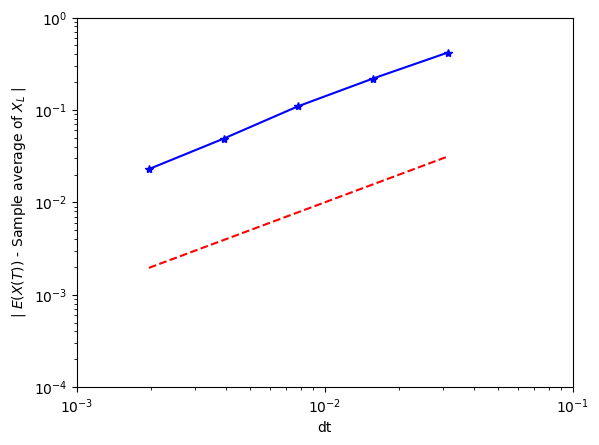

In [4]:
# Plot

Dtvals=np.power(float(2),[x-10 for x in range(1,6)])
plt.loglog(Dtvals,Xerr, 'b*-')
plt.loglog(Dtvals,Dtvals, 'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel('dt');
plt.ylabel('| $E(X(T))$ - Sample average of $X_L$ |')
#plt.title('emweak.py', fontsize=16)

In [5]:
### Least squares fit of error = C * Dt^q ###

A = np.column_stack((np.ones((p,1)), np.log(Dtvals))); rhs=np.log(Xerr)
sol = np.linalg.lstsq(A,rhs,rcond = None)[0]; q=sol[1][0]
resid=np.linalg.norm(np.dot(A,sol) - rhs)
print('q = ', q)
print('residual = ', resid)


q =  1.0531165781032479
residual =  0.10123885638205146
